In [5]:
from parser import Parser
from genetic_algorithm import GeneticAlgorithm
import matplotlib.pyplot as plt
import numpy as np


#### Only for test, use main.py

In [6]:
GA = GeneticAlgorithm()

In [7]:
p = Parser("data/pcbouman-eur-TSP-D-Instances-8a6d795/uniform/uniform-10-n5.txt",
"data/pcbouman-eur-TSP-D-Instances-8a6d795/uniform/solutions/uniform-10-n5-DP.txt")
p.get_input_data()

In [8]:
points = np.array([p.X,p.Y])
points = points.T
points

array([[ 0.72685927,  0.40704529],
       [81.        , 70.        ],
       [99.        , 34.        ],
       [82.        ,  2.        ],
       [69.        , 26.        ]])

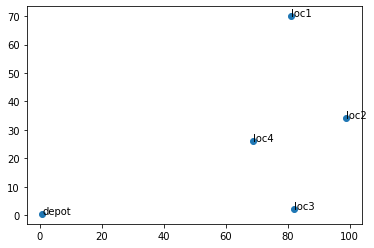

In [9]:
plt.plot(p.X, p.Y, 'o')
for i, txt in enumerate(p.loc):
    plt.annotate(txt, (p.X[i], p.Y[i]))

In [10]:
truck_dist =[]
for el in points:
    d = np.linalg.norm(el - points, axis=1)
    truck_dist.append(d.tolist())
truck_dist = np.array(truck_dist)

In [11]:
drone_dist = []
for el in points:
    d = np.linalg.norm(el - points, axis=1) * p.speed_of_drone
    drone_dist.append(d.tolist())
drone_dist = np.array(drone_dist)

In [12]:
nr_params = 5
nr_of_iteration = 2000
nr_of_population = 50

In [13]:
test = np.array([[2,0],[2,1],[4,1],[3,0],[1,1]]) 

In [14]:
def TSP(x):
    idx_d = np.where(x[:,-1] == 0)
    idx_t = np.where(x[:,-1] == 1)
    d = x[idx_d,0][0]
    t = x[idx_t,0][0]
    el_d = np.array([idx_d[0], d])
    el_t = np.array([idx_t[0], t])
    return truck_dist[el_d[0], el_d[1]].sum() + (truck_dist[el_t[0], el_t[1]]).sum()
TSP(test)

220.76072507411683

In [16]:
GA.set_fitness_function(TSP)
GA.set_parameters(nr_params)
GA.set_population_size(nr_of_iteration)
GA.set_iteration(nr_of_iteration)

In [17]:
GA.run(1)

TypeError: TSP() takes 1 positional argument but 2 were given

In [ ]:
# test = np.array([0,1,2,3,3,3,5, 5, 2])
# aux = [test[0]]

# for el in range(1,len(test)):
#     if test[el-1] != test[el]:
#         aux.append(test[el])
# len(np.unique(aux)) == len(aux)

In [ ]:
# np.unique([5,5,5,4,3,2])